# Lab 2: Entanglement
### Review:
So far, we've learned how to use qubits to represent bits by giving them dentermined values. We've alterted these qubits using gates such as the NOT (.x), CNOT (.cx), and Toffoli (.ccx). 

Most recently, we've discoved how qubits can be represented using complex amplitudes, with split probabilities of being in one of two states by acting the Haddamard (.h) gate on them.

In this lab, we will introduce the concept of entanglement, from a physical and computational standpoint. We will then explore some interesting qualities of entanglement by running code on a real quantum computer!

## 2.1 What is Entanglement?

In the physical world, particles are described by their mass, electric charge, and spin. Heavily charged particles act strong electrostatic forces on other charges, massive particles have a analagous effect in the gravitational field. Interestingly, spin is different -- it is quantized into positive and negative states, for example the electron can have spin +1/2 or spin -1/2. Spin, unlike mass or charge, also follows the probablitic nature of quantum mechanics. This means that when you measure a particle's spin you get either the positive or negative value with some probability that is, surprisingly, determined by the kind of measurement. 

For example, if we set the orientation of an electron's spin in the positive vertical direction, so that its spin is up, then we measure it in the positive horizontal direction, the spin will actually be measured with a 50% proability of being oriented right and 50% left. If we again initiate the electron with postive verticle spin, then tilt our angle of measurement to say, 60 degrees from the verticle, our particle will now be measured 75% spin in the direction of measurement and 25% in the opposite direction. An irrelevent but intertesting observation is that the probability of spin in the direction of measurement is equal to $\cos^{2}(\theta/2)$, for $\theta$ degrees from the horizontal.

Let's conduct a thought experiment. Suppose we create two photons using Einstein's energy-mass relation. By conservation of angular momentum, the sum of the particles' spins must be zero, thus they must be equal and opposite. This is the experiement Einstein proposed in the 1930s to prove his mathematical derivation of entanglement. The particles are entangled because if we measure one in some orientation, the other particle must have the opposite orientation. We will 'simulate' this experiment at the end of this lab!

## 2.2 Entangled Qubits
Let's explore the similarities between entangled particles and entangled qubits. 

In [1]:
import qiskit

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

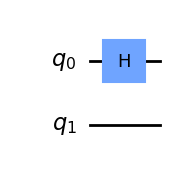

In [4]:
#Recall the H gate
qc=QuantumCircuit(2)
qc.h(0)
qc.draw(output='mpl')

Like we saw with the CNOT gate last lecture, we can represent this circuit with a tensor product. Let's try for practice.

$|0⟩ \otimes H|0⟩ = |0⟩ \otimes |+⟩ = |0⟩ \otimes (\frac{1}{ \sqrt{2}}|0⟩ + \frac{1}{ \sqrt{2}}|1⟩) $
$= \frac{1}{ \sqrt{2}}|0⟩ \otimes |0⟩ + \frac{1}{ \sqrt{2}}|0⟩ \otimes |1⟩ = \frac{1}{ \sqrt{2}} (|00⟩ + |01⟩) = \frac{1}{ \sqrt{2}} \begin{bmatrix}1 \\ 1 \\ 0 \\ 0 \end{bmatrix} $

Qiskit actually has built in functions to check our work!

In [5]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

Voila! Our state is a combination of $\begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$
and
$\begin{bmatrix}0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$.

The probability of finding our vector in one state or the other is now 50-50, just like our particle with spin, interesting! Let's check this is the case...

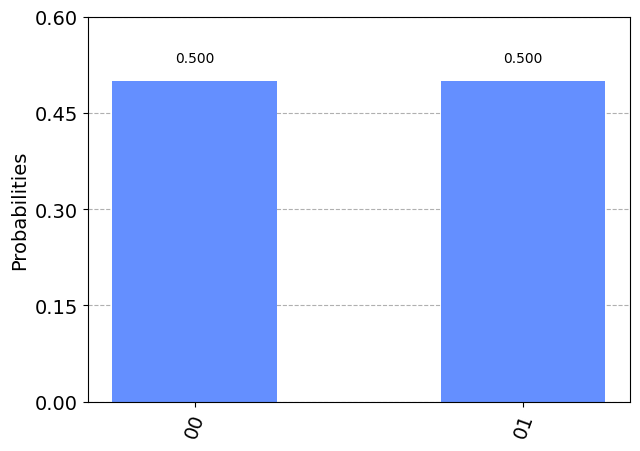

In [6]:
result = svsim.run(qobj).result()
plot_histogram(result.get_counts())

Perfect. Now how do we 'entangle' two 'particles'? 
What we need is a dependence between the two states. We need one state's measurement to be directly opposite to the other. Recall that the CNOT gate...

|Input| | Output| |
|---|---|---|---|
| Cont. | Targ. | Cont. | Targ. |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

relates two qubits in a similar way, its output tells us whether or not two qubits are identical or not. Let's explore what happens when we act a CNOT gate on a qubit in superposition.

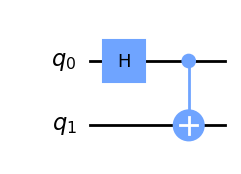

In [7]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0, 1)
qc.draw(output='mpl')

If we know the target qubit is initially 0, then we measure it to be 1, it implies that the control qubit must have been 1. If the target is initally 0, then we measure it to be 0, the control qubit must have been 0. We can determine the control qubit's state without measuring it, and it is completely probabilistic. This is truly entanglement!

But we're physicists, we're intruiged by the deeper meanings of these results, so why don't we explore what happens in the state vectors. Remember from last lecture that the CNOT swaps the amplitudes |01⟩ and |11⟩: 

$|a⟩ = \begin{bmatrix}a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \rightarrow CNOT|a⟩ = \begin{bmatrix}a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix}$

We can check that this occurs in our circuit:

In [8]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

Which can also be written as, 

$CNOT|0+⟩ = \frac{1}{ \sqrt{2}} (|00⟩ + |11⟩)$

This is called the **Bell State**, and its entangledness is what makes it incredible, and what gives so muc hpower to the Haddamard gate.

## 2.3 Real Quantum Entanglement
Finally, let's put our newfound tool to good use, exploring the behavior of real life quantum computers.
1. Create an IBM Quantum account or log in to your existing account by visiting the [IBMQ login page](https://quantum-computing.ibm.com/login)

2. Copy (and/or optionally regenerate) your API token from your [IBM Quantum account page](https://quantum-computing.ibm.com/account)

3. Paste your token below and run the cell

In [9]:
from qiskit import IBMQ
#Save your credentials to your local disk
IBMQ.save_account('c47edaaf878afef28047bd05282a7f3815a2048184190f2284b897b9b1395f2b892ad5eda210f750f13b2d774b7087e33fa225b05ecc8403137b06d44eda75d7')

In [10]:
#Now we select a IBMQ backend
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

These are the different IBM QCs we can use! All except the ibmq_qasm_simulator are real. Other companies like IonQ provide their own backends (QCs) that we can use too. We'll get more into them later in the course. For now select the Lima QC.

In [11]:
backend = provider.get_backend('ibmq_lima')
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [1]:
from qiskit import execute

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

job = execute(qc, backend)  #get the job objecct

# check if job is complete
from qiskit.providers.jobstatus import JobStatus
import time
while job.status() is not JobStatus.DONE:
    print("Job status is", job.status() )
    time.sleep(60)
    
result = job.result() # get result object
counts = result.get_counts() #get the counts dictionary
plot_histogram(counts) #plot the histogram of the counts 

NameError: name 'QuantumCircuit' is not defined

## 2.4 Backend Resources

Below is an example of how to filter backends, where we filter for number of qubits, and remove simulators:

In [ ]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

One convenient way to choose a system is using the least_busy function to get the backend with the lowest number of jobs in queue. The downside is that the result might have relatively poor accuracy because, not surprisingly, the lowest error rate systems are the most popular.

In [ ]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend